# Challenge Programs - Week 4 (Functions and a little Pandas)



## Find factors of a number

Write a function `GetFactors(x)` that takes a number 'x' and returns a list of all the factors of x.

Use this function to print a list of all factors of 320

In [7]:
# Python Program to find the factors of a number

# define a function
def GetFactors(x):
    x=int(x)
    # This function takes a number and prints the factors
    factors = []
    for i in range(1, x + 1):
        if x % i == 0:
            factors.append(i)

    return factors


# change this value for a different result.
num = 320.0

print (GetFactors(num))

[1, 2, 4, 5, 8, 10, 16, 20, 32, 40, 64, 80, 160, 320]


## Application of Mannings equation

Mannings equation is often used to estimate the flow velocity in natural channels based on the channel geometry (D<sub>H</sub>, m), the channel slope ($\theta$, radians), and a "roughness" coefficient (n) that relates to the friction generated along the channel bottom/sides. 

>$ \displaystyle V = \frac{1}{n} \left( \frac{R_H}{4}\right)^{(2/3)} \sqrt { \sin \theta } $

R<sub>H</sub> is the *hydraulic radius* (defined as the crss sectional channel area/*wetted perimeter*).  For rectangular channels, the wetted perimeter = channel width + 2*channel height.  Mannings equation assumes steady, uniform, turbulent flow.

Write a function `ManningsVelocity()` that solves Mannings equation for rectangular channels with given values of width, height, $\theta$, and n, and returns the flow velocity (m/s)

Call this function to estimate flow velocities for the following four channels:

| Channel | Width (m) | Height (m) | Slope (degrees) | n (s/m<sup>(1/3)</sup>) |
|---|:---:|:---:|:---:|:---:|
| 1 | 30 | 1 | 2 | 0.05 |
| 2 | 10 | 3 | 2 | 0.05 |
| 3 | 10 | 3 | 4 | 0.05 |
| 4 | 10 | 3 | 4 | 0.025|

Print the channels characteristics and resulting flow velocities for each channel.

In [3]:
import numpy as np

# function to solve mannings equations
def ManningsVelocity( n, width, height, theta):
    wettedPerimeter = width + (2*height)
    csa = width + height
    RH = csa/wettedPerimeter
    
    velocity = (1/n) * np.power((RH/4), (2.0/3.0)) * np.sqrt(np.sin(theta))
    return velocity
    

widths = np.array([30,10,10,10])
heights = np.array([1,3,3,3])
thetas = np.array([2,2,4,4])*np.pi/180
ns = np.array([0.05,0.05,0.05,0.025])

velocities = ManningsVelocity(ns,widths,heights,thetas)

for i in range(0,len(widths)):
    print( "Channel {}: w={},h={},theta={:.2f},n={:.2f} has a flow velocity of {:.2f} m/s".format( 
        i, widths[i], heights[i], thetas[i],ns[i],velocities[i]))

Channel 0: w=30,h=1,theta=0.03,n=0.05 has a flow velocity of 1.45 m/s
Channel 1: w=10,h=3,theta=0.03,n=0.05 has a flow velocity of 1.29 m/s
Channel 2: w=10,h=3,theta=0.07,n=0.05 has a flow velocity of 1.83 m/s
Channel 3: w=10,h=3,theta=0.07,n=0.03 has a flow velocity of 3.65 m/s


## Data Analysis using Pandas

**The first part of this challenge is to load and plot some data.**

Use the `pandas` library to load the dataset at: http://explorer.bee.oregonstate.edu/Topic/Modeling/data/AgrimetClimateCRVO.xlsx. 

Use the `matplotlib.pyplot` library to plot the data.  This dataset contains, among other things, columns labeled 'Date', TempMin-F' and 'TempMax-F', which you should extract from this dataset.  Generate a plot of the two Temperatures vs. Date on a single plot. Include a legend on the plot.  Draw the min temperature in blue, and the max temperature in red.

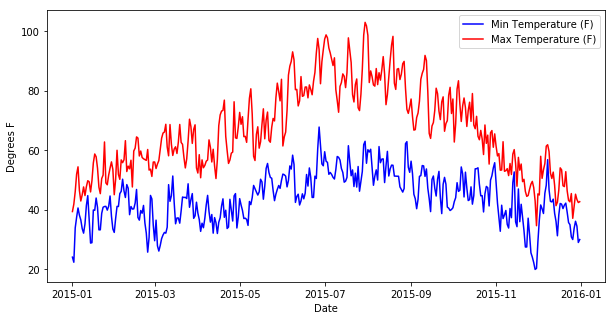

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_excel("http://explorer.bee.oregonstate.edu/Topic/Modeling/data/AgrimetClimateCRVO.xlsx", usecols=(0,1,2))

dates = df['Date']
tMins = df['TempMin-F']
tMaxs = df['TempMax-F']

# plot results
plt.figure(figsize=(10,5))
plt.plot( dates, tMins, color='blue', label="Min Temperature (F)" )
plt.plot( dates, tMaxs, color='red', label="Max Temperature (F)" )
plt.xlabel("Date")
plt.ylabel("Degrees F")
plt.legend()
plt.show()

#### For the second part of this challenge ...

, define a function `GrowingDegreeDays()` that calculates the **growing degree days (GDDs)** 
accumlated over a day.  GDDs are defined as the difference between the 
**mean daily air temperature** and a **base temperature** 
if the mean daily air temperature is greater than the base temperature.   If the mean air temperature is less than the base temperature, no degree days are accumulated.  

Mean air temperature is defined as the average between the min and max air temperatures for the day, unless the max air temperature > 86F; in this case, the mean air temperature is defined as 86F-min air temperature.
For each day (row) in the dataset, calculate the GDD for that day, **assuming a base temperature of 50F**, and collect all GDDs into an array

Plot GDD vs Day.  Label the x and y axes.

Report the sum of the daily GDD's over the observational period.

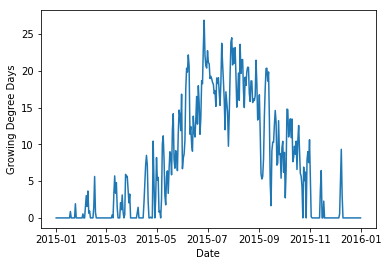

Total Sum of GDDs: 2594.56


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

def GrowingDegreeDays( tMin, tMax, tBase ):
    """
    Calculates Growing Degree Days
    :param tMin: Minimum daily temperature (F)
    :param tMax: Maximum daily temperature (F)
    :param tBase: Base temperature (F)
    :return: growing degree days for this day
    """
    
    if tMax > 86:
        tMax = 86
        
    tMean = (tMax+tMin)/2
    gdd =  tMean - tBase
    if gdd < 0:
        gdd = 0
    return gdd

df = pd.read_excel("http://explorer.bee.oregonstate.edu/Topic/Modeling/data/AgrimetClimateCRVO.xlsx", usecols=(0,1,2))

tBase = 50
dates = df['Date']
tMins = df['TempMin-F']
tMaxs = df['TempMax-F']

gdds = np.zeros(len(dates)) 
for i in range(0, len(dates)):
    gdds[i] = GrowingDegreeDays( tMins[i], tMaxs[i], tBase )

# plot results
plt.plot( dates, gdds )
plt.xlabel("Date")
plt.ylabel("Growing Degree Days")
plt.show()

print("Total Sum of GDDs: {:.2f}".format(np.sum(gdds)))